# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [2]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [3]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [4]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return (np.square(np.dot(X, w) - y)).mean()
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return 2.0/len(y)*np.dot(X.T, np.dot(X, w) - y)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [5]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [6]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 1000000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    traj = [w_init]
    for _ in range(n_iterations):
        w_0 = traj[-1]
        traj.append(w_0 - lr*loss.calc_grad(X, y, w_0))
    return traj

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [7]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)
print(w_init.shape)

(300, 2)
(300,)
(2,)


In [8]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [9]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, title=""):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory. " + title)
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


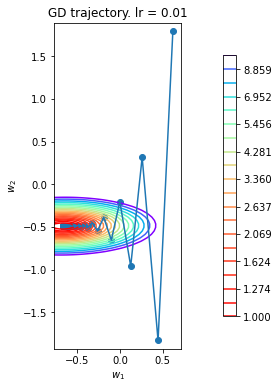

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


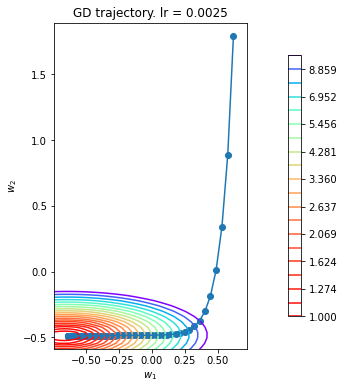

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


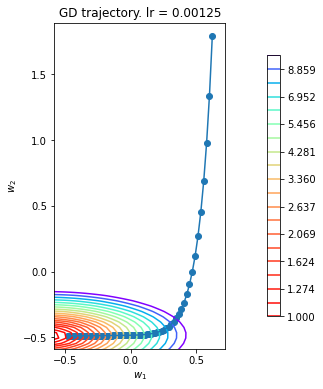

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


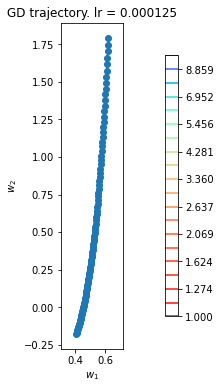

In [10]:
# l_rates = [0.1, 0.05, 0.025, 0.0025, 0.00125, 0.000125, 0.0001]
l_rates = [0.01, 0.0025, 0.00125, 0.000125]
for lr in l_rates:
    plot_gd(gradient_descent(w_init, X, y, MSELoss(), lr, 100), X, y, MSELoss(), title=f"lr = {lr}")

При lr = 0.01 алгоритм градиетного спуска делает слишком большие шаги и двигается почти вдоль линий уровня, а не перендикулрно к ним.

При lr = 0.0025 траектория визульно близка к оптимальной, по картинке похоже, что спуск сошелся к минимуму

При lr = 0.00125 траектория также визульно близка к оптимальной, но спуск останавливается, не дойдя до минимума. Для такого lr в спуске используется слишком маленькое значение количества шагов.

При lr = 0.000125 видна только правая часть траектории, для такого lr недостаточное количество шагов.

Можно сделать вывод, что из рассмотренных lr и количества шагов = 100 лушим значением является lr = 0.0025

*В общих чертах*, если параметр lr относительно большой, то траектория градиентного спуска колеблется и не исключено, что спуск может или перескочить точку минимума, или прыгать вокруг нее, делая большие шаги.

При оптимальном параметре lr траектория спуска плавная и спуск останавливается около точки минимума

При относительно маленьком lr спуск может не достигнуть окрестности точки минимума и для того, чтобы он сошелся, понадобится больше итераций.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [12]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 100) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    traj = [w_init]
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        w_0 = traj[-1]
        traj.append(w_0 - lr*loss.calc_grad(X_batch, y_batch, w_0))
    return traj

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


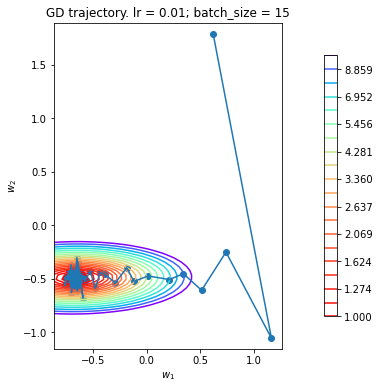

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


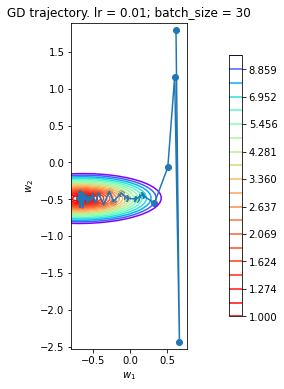

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


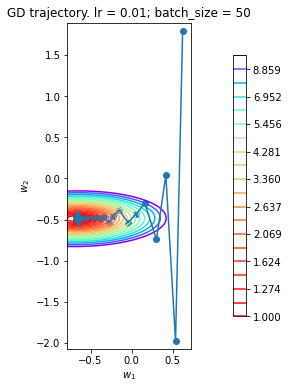

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


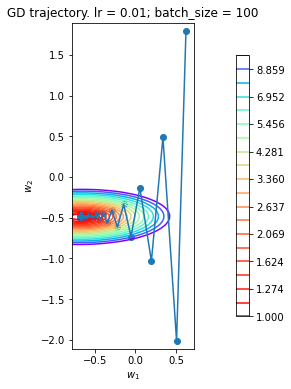

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


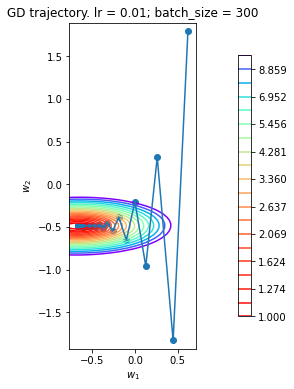

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


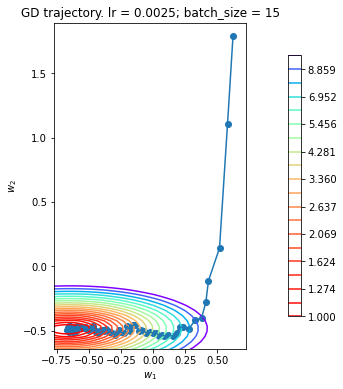

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


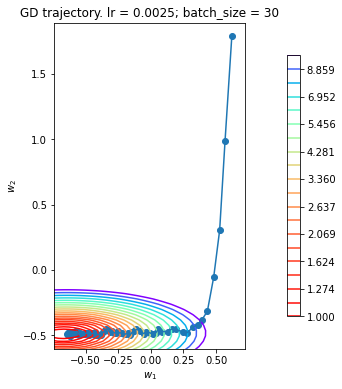

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


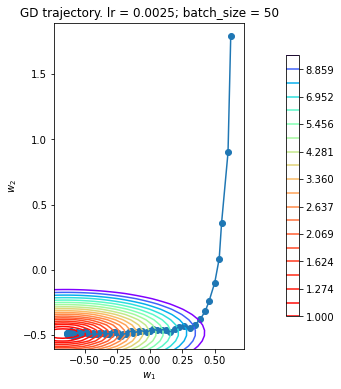

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


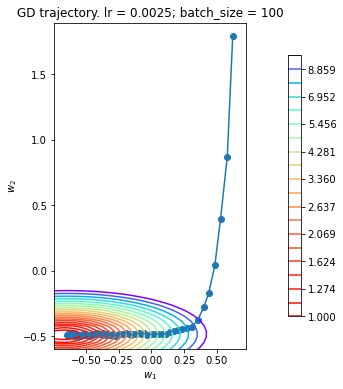

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


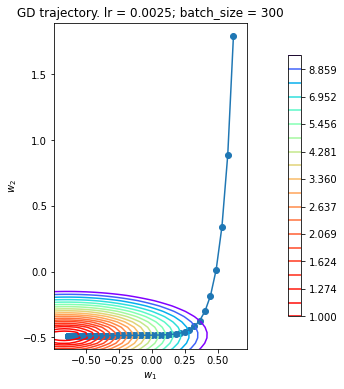

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


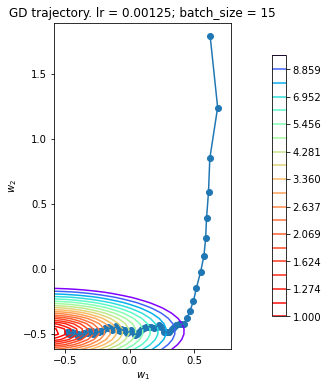

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


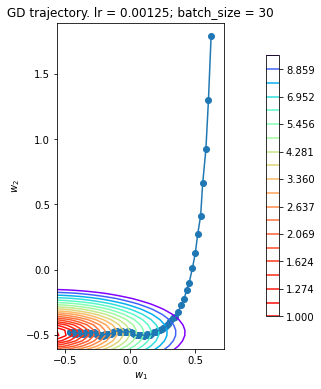

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


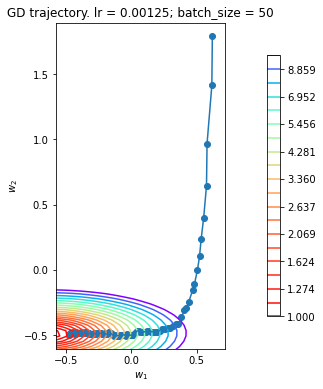

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


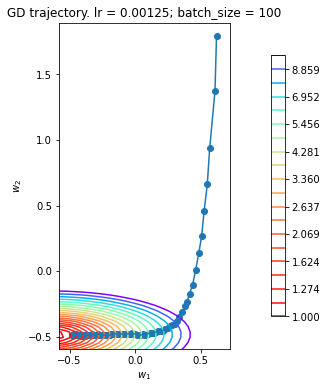

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


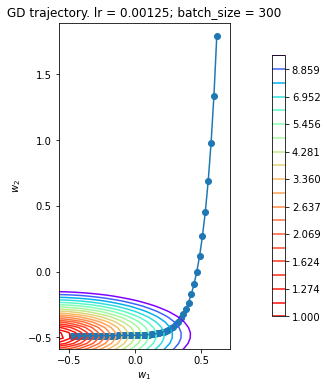

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


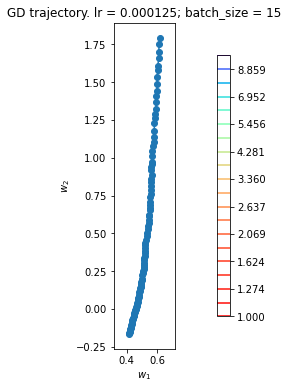

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


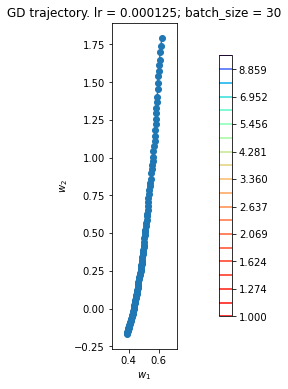

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


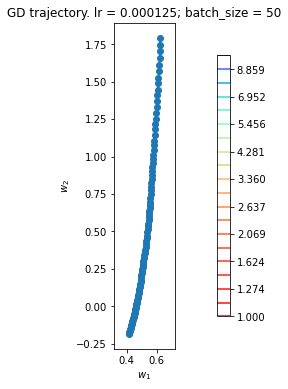

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


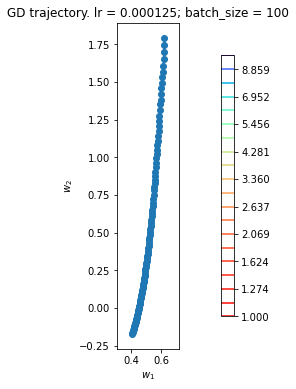

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


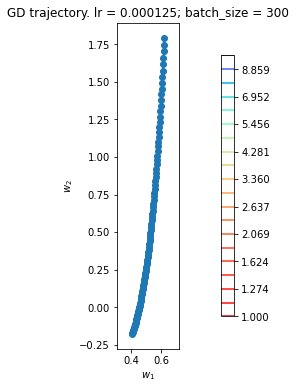

In [13]:
# l_rates = [0.1, 0.05, 0.025, 0.0025, 0.00125, 0.000125, 0.0001]
# batch_sizes = [1, 10, 50, 100, 150, 200, 300]
l_rates = [0.01, 0.0025, 0.00125, 0.000125]
batch_sizes = [15, 30, 50, 100, 300]
for lr in l_rates:
    for batch_size in batch_sizes:
        plot_gd(stochastic_gradient_descent(w_init, X, y, MSELoss(), lr, batch_size), X, y, MSELoss(), title=f"lr = {lr}; batch_size = {batch_size}")

При одинаковом количестве шагов обычный и стохастический градиентные спуски довольно похожи на вид. 

При равных lr траектории стохастического спуска становятся более гладкими с ростом batch_size, а при равных batch_size траектории напоминают те картинки, которые получились у нас для обычного градиентного спуска. 

Можно сделать вывод, что lr влияет на траектории стохастического спуска так же, как влияет на траекторию обычного градиентного спуска.

Меньший batch_size делает траекторию стохастического спуска более скачкообразной, за счет чего дает спуску шанс перепрыгнуть локальные минимумы (но на картинке этого не видно), а с ростом batch_size траектория приближается к траектории обычного градиентного спуска.

Стохастический спуск принципиально различен в своем поведении с обычным спуском тем, что принимает решение на основе подмножества значений, а не на основе всех. То есть, на каждом шаге он движется к условному минимуму по подвыборке. Это позволяет ему работать быстрее, но сходиться дольше.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [15]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    traj = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        w_0 = traj[-1]
        lr_1 = lr*((1/(1 + i + 1))**p)
        traj.append(w_0 - lr_1*loss.calc_grad(X_batch, y_batch, w_0))
    return traj

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


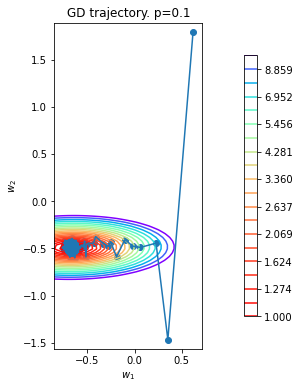

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


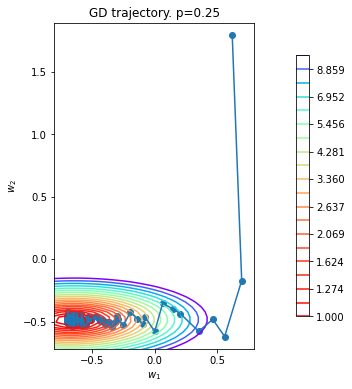

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


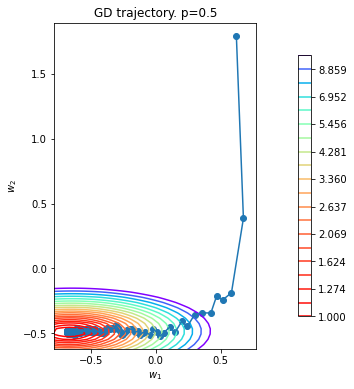

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


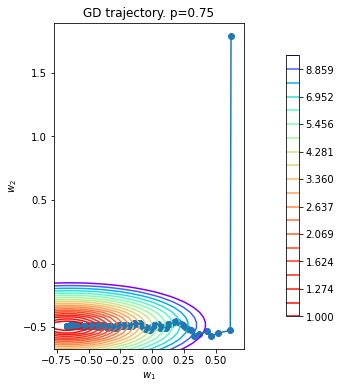

<ipython-input-9-d1cbd082a679>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


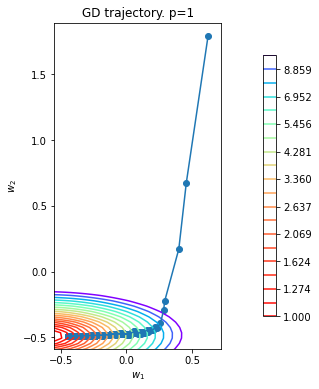

In [16]:
p_s = [0.1, 0.25, 0.5, 0.75, 1]
for p in p_s:
    plot_gd(stochastic_gradient_descent(w_init, X, y, MSELoss(), 0.01, 10, p, 100000), X, y, MSELoss(), title=f"p={p}")

При маленьких p колебания затухают медленно. Это особенно заметно на первом графике, где колебания есть даже около точки минимума.
С ростом p длина шага уменьшается сильнее, траектория сглаживается и для сходимости начинает требоваться все большее число шагов. Это заметно на последнем графике, где траектория довольно гладкая, но окрестность минимума не достигнута.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

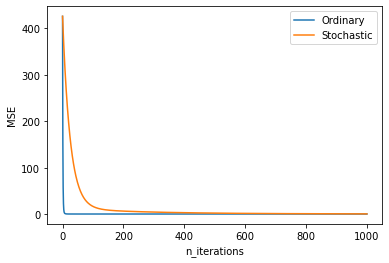

In [36]:
loss = MSELoss()
ordinary_loss = []
stochastic_loss = []
ordinary_traj = gradient_descent(w_init, X, y, loss, 0.01, 1000)
stochastic_traj = stochastic_gradient_descent(w_init, X, y, MSELoss(), lr, batch_size, 0)
for w in ordinary_traj:
    ordinary_loss.append(loss.calc_loss(X, y, w))

for w in stochastic_traj:
    stochastic_loss.append(loss.calc_loss(X, y, w))

plt.plot(ordinary_loss, label="Ordinary")
plt.plot(stochastic_loss, label="Stochastic")
plt.xlabel("n_iterations")
plt.ylabel("MSE")
plt.legend()
plt.show()

Здесь не видно преимущества SGD, так как он сходится медленнее из-за того, что при выборе направления движения на каждом шаге он ориентируется лишь на часть выборки.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [37]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.ones(X.shape[1])
        traj = gradient_descent(w_init, X, y, self.loss, self.lr, 100000)
        self.w = traj[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [38]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [39]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [40]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [41]:
X_raw = X_raw.set_index("index")
X_raw.columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg"]

In [42]:
X_raw.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
index,,,,,,,,,,,,,,,,,,,,,
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

> Заполните пропуски

Заполним только категориальный признак, отвечающий за количество дверей

In [43]:
X_raw["num-of-doors"].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

на самый популярный вариант `four`

In [44]:
X_raw['num-of-doors'].replace(np.nan, "four", inplace=True)

Числовые признаки будем заменять отдельно для тренировочной и тестовой выборок

> Разделите датасет на обучающую и тестовую выборку

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_raw_train, X_raw_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.25, random_state=10)

> Заполните пропуски

Заполним числовые признаки средними значениями

In [49]:
X_filled_train = X_raw_train.fillna(X_raw_train[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]].mean(axis=0))
X_filled_test = X_raw_test.fillna(X_raw_test[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]].mean(axis=0))

> Нормализуйте числовые признаки

In [50]:
cat_columns=["symboling", "make",  "fuel-type",  "aspiration",  "num-of-doors",  "body-style",  "drive-wheels",  "engine-location",  "engine-type",  "num-of-cylinders",  "fuel-system"]
numerical_columns = list(set(X_filled_train.columns) - set(cat_columns))

In [51]:
numerical_columns

['width',
 'normalized-losses',
 'length',
 'engine-size',
 'compression-ratio',
 'height',
 'bore',
 'wheel-base',
 'stroke',
 'horsepower',
 'peak-rpm',
 'highway-mpg',
 'curb-weight',
 'city-mpg']

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_filled_train[numerical_columns] = scaler.fit_transform(X_filled_train[numerical_columns]) 
X_filled_test[numerical_columns] = scaler.transform(X_filled_test[numerical_columns]) 
X_train = X_filled_train[numerical_columns]
X_test = X_filled_test[numerical_columns]

In [53]:
X_filled_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
index,,,,,,,,,,,,,,,,,,,,,
46,2,4.637375e-16,isuzu,gas,std,two,hatchback,rwd,front,-0.469375,...,four,-0.193353,spfi,0.366919,-0.075098,-0.228130,-0.359104,-0.269928,-0.197017,-0.258092
104,3,2.381112e+00,nissan,gas,std,two,hatchback,rwd,front,-1.207190,...,six,1.301394,mpfi,0.366919,0.045712,-0.279315,1.586587,0.150117,-0.982991,-0.844666
174,-1,-1.828497e+00,toyota,diesel,turbo,four,sedan,fwd,front,0.535308,...,four,-0.410332,idi,-0.225758,0.287332,3.175655,-0.831629,-1.320042,0.746151,0.328481
22,1,-9.896779e-02,dodge,gas,std,two,hatchback,fwd,front,-0.830433,...,four,-0.892509,2bbl,-1.337028,-0.075098,-0.176946,-0.970607,0.780185,0.903346,1.061698
63,0,4.637375e-16,mazda,diesel,std,four,sedan,fwd,front,-0.029827,...,four,-0.121026,idi,0.218750,0.408142,3.226840,-1.081789,-1.005008,1.689319,1.648271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,1.304235e+00,peugot,diesel,turbo,four,sedan,rwd,front,1.398707,...,four,0.602238,idi,1.367063,0.800775,2.791769,-0.220126,-2.055121,0.431761,0.328481
67,-1,-9.147834e-01,mercedes-benz,diesel,turbo,four,sedan,rwd,front,1.728369,...,five,1.349612,idi,0.922555,1.163205,2.919731,0.558150,-1.635076,-0.511407,-0.844666
16,0,4.637375e-16,bmw,gas,std,two,sedan,rwd,front,0.707988,...,six,1.976442,mpfi,1.070724,0.408142,-0.535239,2.198090,0.570162,-1.454575,-1.284596


> Закодируйте категориальные переменные

In [54]:
for col in cat_columns:
    X_train_dummies = pd.get_dummies(X_filled_train[col], prefix=f'{col}_')
    X_test_dummies = pd.get_dummies(X_filled_test[col], prefix=f'{col}_')
    
    both_columns = list(set(X_train_dummies.columns) & set(X_test_dummies.columns))
    train_only_columns = list(set(X_train_dummies.columns) - set(X_test_dummies.columns))
    
    X_test_dummies = X_test_dummies[both_columns]
    X_test_dummies[train_only_columns] = 0
    
    X_train = X_train.join(X_train_dummies)
    X_test = X_test.join(X_test_dummies)

In [55]:
X_train.head()

,width,normalized-losses,length,engine-size,compression-ratio,height,bore,wheel-base,stroke,horsepower,...,num-of-cylinders__three,num-of-cylinders__two,fuel-system__1bbl,fuel-system__2bbl,fuel-system__4bbl,fuel-system__idi,fuel-system__mfi,fuel-system__mpfi,fuel-system__spdi,fuel-system__spfi
index,,,,,,,,,,,,,,,,,,,,,
46,-0.320518,4.637375e-16,-0.149439,-0.193353,-0.228130,-1.086824,0.366919,-0.469375,-0.075098,-0.359104,...,0,0,0,0,0,0,0,0,0,1
104,0.943453,2.381112e+00,-0.299140,1.301394,-0.279315,-1.810806,0.366919,-1.207190,0.045712,1.586587,...,0,0,0,0,0,0,0,1,0,0
174,0.288060,-1.828497e+00,0.086932,-0.410332,3.175655,0.403726,-0.225758,0.535308,0.287332,-0.831629,...,0,0,0,0,0,1,0,0,0,0
22,-0.975910,-9.896779e-02,-1.354930,-0.892509,-0.176946,-1.342347,-1.337028,-0.830433,-0.075098,-0.970607,...,0,0,0,1,0,0,0,0,0,0
63,0.288060,4.637375e-16,0.260271,-0.121026,3.226840,0.659249,0.218750,-0.029827,0.408142,-1.081789,...,0,0,0,0,0,1,0,0,0,0


In [56]:
X_test.head()

,width,normalized-losses,length,engine-size,compression-ratio,height,bore,wheel-base,stroke,horsepower,...,num-of-cylinders__two,num-of-cylinders__three,fuel-system__mpfi,fuel-system__1bbl,fuel-system__2bbl,fuel-system__spdi,fuel-system__idi,fuel-system__4bbl,fuel-system__mfi,fuel-system__spfi
index,,,,,,,,,,,,,,,,,,,,,
62,0.288060,-0.196866,0.260271,-0.121026,-0.381685,0.659249,0.218750,-0.029827,0.408142,-0.525877,...,0,0,0,0,1,0,0,0,0,0
5,0.194433,0.123245,0.220875,0.216497,-0.407277,-0.362843,-0.522097,0.127155,0.438345,0.196808,...,0,0,1,0,0,0,0,0,0,0
21,-0.975910,-0.098968,-1.354930,-0.892509,-0.174386,-1.342347,-1.337028,-0.830433,-0.075098,-0.970607,...,0,0,0,0,1,0,0,0,0,0
131,0.334874,0.123245,0.181480,0.120062,-0.356092,-1.470108,0.478046,-0.453677,1.948471,0.052827,...,0,0,1,0,0,0,0,0,0,0
55,-0.086449,0.945276,-0.433084,-1.374685,-0.176946,-1.853393,-0.003504,-0.579263,0.024755,-0.053353,...,1,0,0,0,0,0,0,1,0,0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [57]:
linear_regression = LinearRegression(MSELoss(), lr=0.1)

linear_regression = linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [58]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, linear_regression.predict(X_train)))
print(mean_squared_error(y_test, linear_regression.predict(X_test)))

1905297.1248400605
50845982.481849074


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

In [59]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        return np.square(np.dot(X, w) - y).mean + self.coef * np.square(np.delete(w, -1))
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w_new = np.delete(w, -1)
        w_new = np.append(w_new, 0)
        return 2/len(y)*np.dot(X.T, np.dot(X, w) - y) + np.dot(2*self.coef, w_new)

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [60]:
linear_regression = LinearRegression(MSEL2Loss(0.3))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [61]:
linear_regression = linear_regression.fit(X_train, y_train)
print(mean_squared_error(y_train, linear_regression.predict(X_train)))
print(mean_squared_error(y_test, linear_regression.predict(X_test)))

8055093.617540922
8551636.52662471


На тренировочной выборке с добавлением регуляризации ошибка выросла - с ~2 млн до ~8 млн, а на тестовой снизилась - с примерно 50 млн до 8.5 млн

Модель перестала так сильно подстраиваться под тренировочную выборку и теперь разница между ошибками на тестовой и тренировочной почти незначительная

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [71]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        res = 0
        
        y_pred = np.dot(X, w)
        z = y_pred - y
        phi = np.where(
            (-self.eps < z) & (z < self.eps),
            .5 * z * z,
            self.eps(np.abs(z) - self.eps)
        )
        return phi.mean
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        y_pred = np.dot(X, w)
        z = y_pred - y
        d_phi = np.where(
            (-self.eps < z) & (z < self.eps),
            z,
            self.eps * np.sign(z)
        )[-1, None]
        
        return (X * d_phi).mean()
        

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [93]:
linear_regression = LinearRegression(HuberLoss(1.35))
linear_regression = linear_regression.fit(X_train, y_train)
print(mean_squared_error(y_train, linear_regression.predict(X_train)))
print(mean_squared_error(y_test, linear_regression.predict(X_test)))

30372944.802035637
29417014.370682087


Среднеквадратическая ошибка получилась выше, чем в случае обучения c мсе. Скорее всего, это связанно с тем, что оптимум HuberLoss'a не совпадает с оптимальной точкой MSE. Оптимизируя по градиентам HuberLoss мы не сходились к оптимальным значениям MSE

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

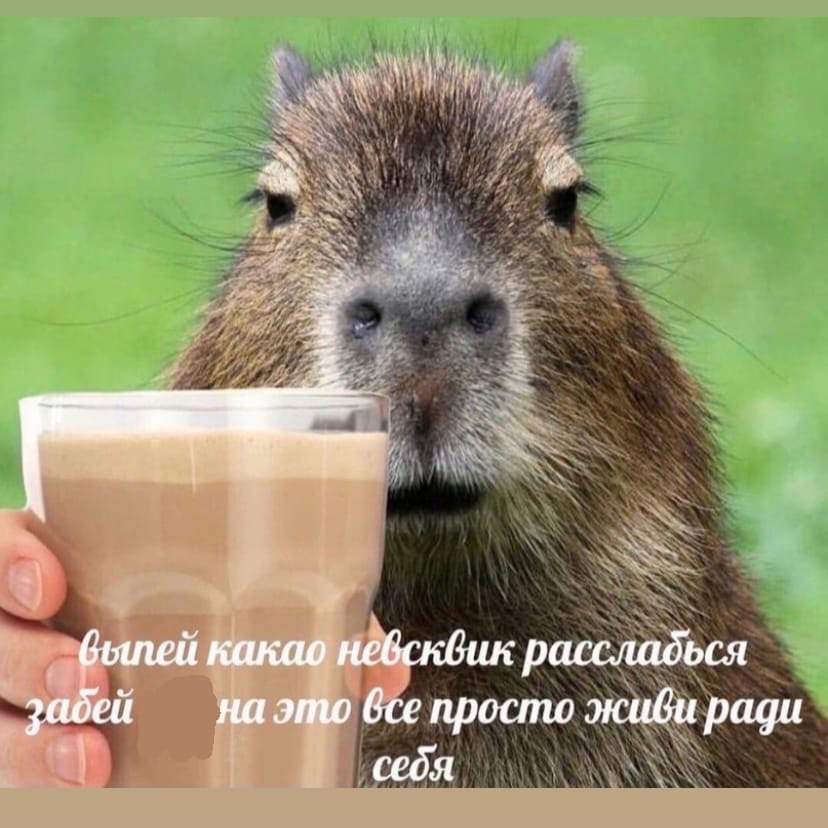

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.